## Creazione di file divisi 
 - coordinate e magnetometro (iss_data.csv)
 - valori di vegetazione (vegetation.csv)

In [1]:
import pandas as pd
import math
import geopandas
from matplotlib import cm

filename_csv = 'woodsmissionteam_data02.csv'

with open(filename_csv,'r') as f:
    vegetation = []
    iss_data = []
    
    for line in f.readlines():
        # Per eliminare il /n finale della riga
        line = line[:-1].split(',')
        if len(line)<10:
            iss_data.append(line)
        else:
            vegetation.append(line)

iss_data = [a[1:2] + a[3:] for a in iss_data]

for c in iss_data:
    
    magnetic_field = math.sqrt(float(c[4])**2 + float(c[5])**2 + float(c[6])**2)
    c.append(magnetic_field)

header=['datetime', 'photo', 'lat', 'lon', 'magx', 'magy', 'magz', 'magnetic_field']
pd.DataFrame(iss_data).to_csv('iss_data.csv', header=header)

header=['photo', 
        '<0.1', '<0.2', '<0.3',
        '<0.4', '<0.5', '<0.6',
        '<0.7', '<0.8', '<0.9',
        '<=1.0', 'diff']
vegetation = [a[3:] for a in vegetation]
pd.DataFrame(vegetation).to_csv('vegetation.csv', header=header, index=False)

## Foto ed istogramma valori

In [2]:
import pandas as pd

iss_df = pd.read_csv('iss_data.csv', index_col=0)
veg_df = pd.read_csv('vegetation.csv', index_col=0)
veg_df.head()

,<0.1,<0.2,<0.3,<0.4,<0.5,<0.6,<0.7,<0.8,<0.9,<=1.0,diff
photo,,,,,,,,,,,
1,0.0992,0.2164,0.0877,0.3168,0.1958,0.0646,0.0157,0.0020,0.0000,0.0000,0.0000
2,0.0937,0.1797,0.0841,0.2239,0.2840,0.1023,0.0256,0.0048,0.0002,0.0000,0.0000
3,0.0926,0.0527,0.1899,0.2008,0.2714,0.1339,0.0449,0.0111,0.0009,0.0000,0.0001
4,0.1757,0.0331,0.1385,0.5630,0.0411,0.0251,0.0182,0.0035,0.0000,0.0000,0.0001
5,0.2051,0.0130,0.2504,0.4792,0.0007,0.0024,0.0117,0.0105,0.0057,0.0197,0.0002


In [3]:
iss_df.head()

,datetime,photo,lat,lon,magx,magy,magz,magnetic_field
0,2020-05-04 17:31:04,-1,-44.943338,25.510683,1.6611,-1.4893,0.9510,2.425215
1,2020-05-04 17:31:30,-1,-44.119238,27.449514,3.0786,-2.7206,1.4259,4.348866
2,2020-05-04 17:31:56,-1,-43.259522,29.330830,4.1995,-3.7227,1.9169,5.930329
3,2020-05-04 17:32:23,-1,-42.331207,31.224756,5.0135,-4.3822,2.2601,7.031850
4,2020-05-04 17:32:49,-1,-41.405081,32.992365,5.6093,-5.0672,2.6800,8.020172


# Rotta della ISS


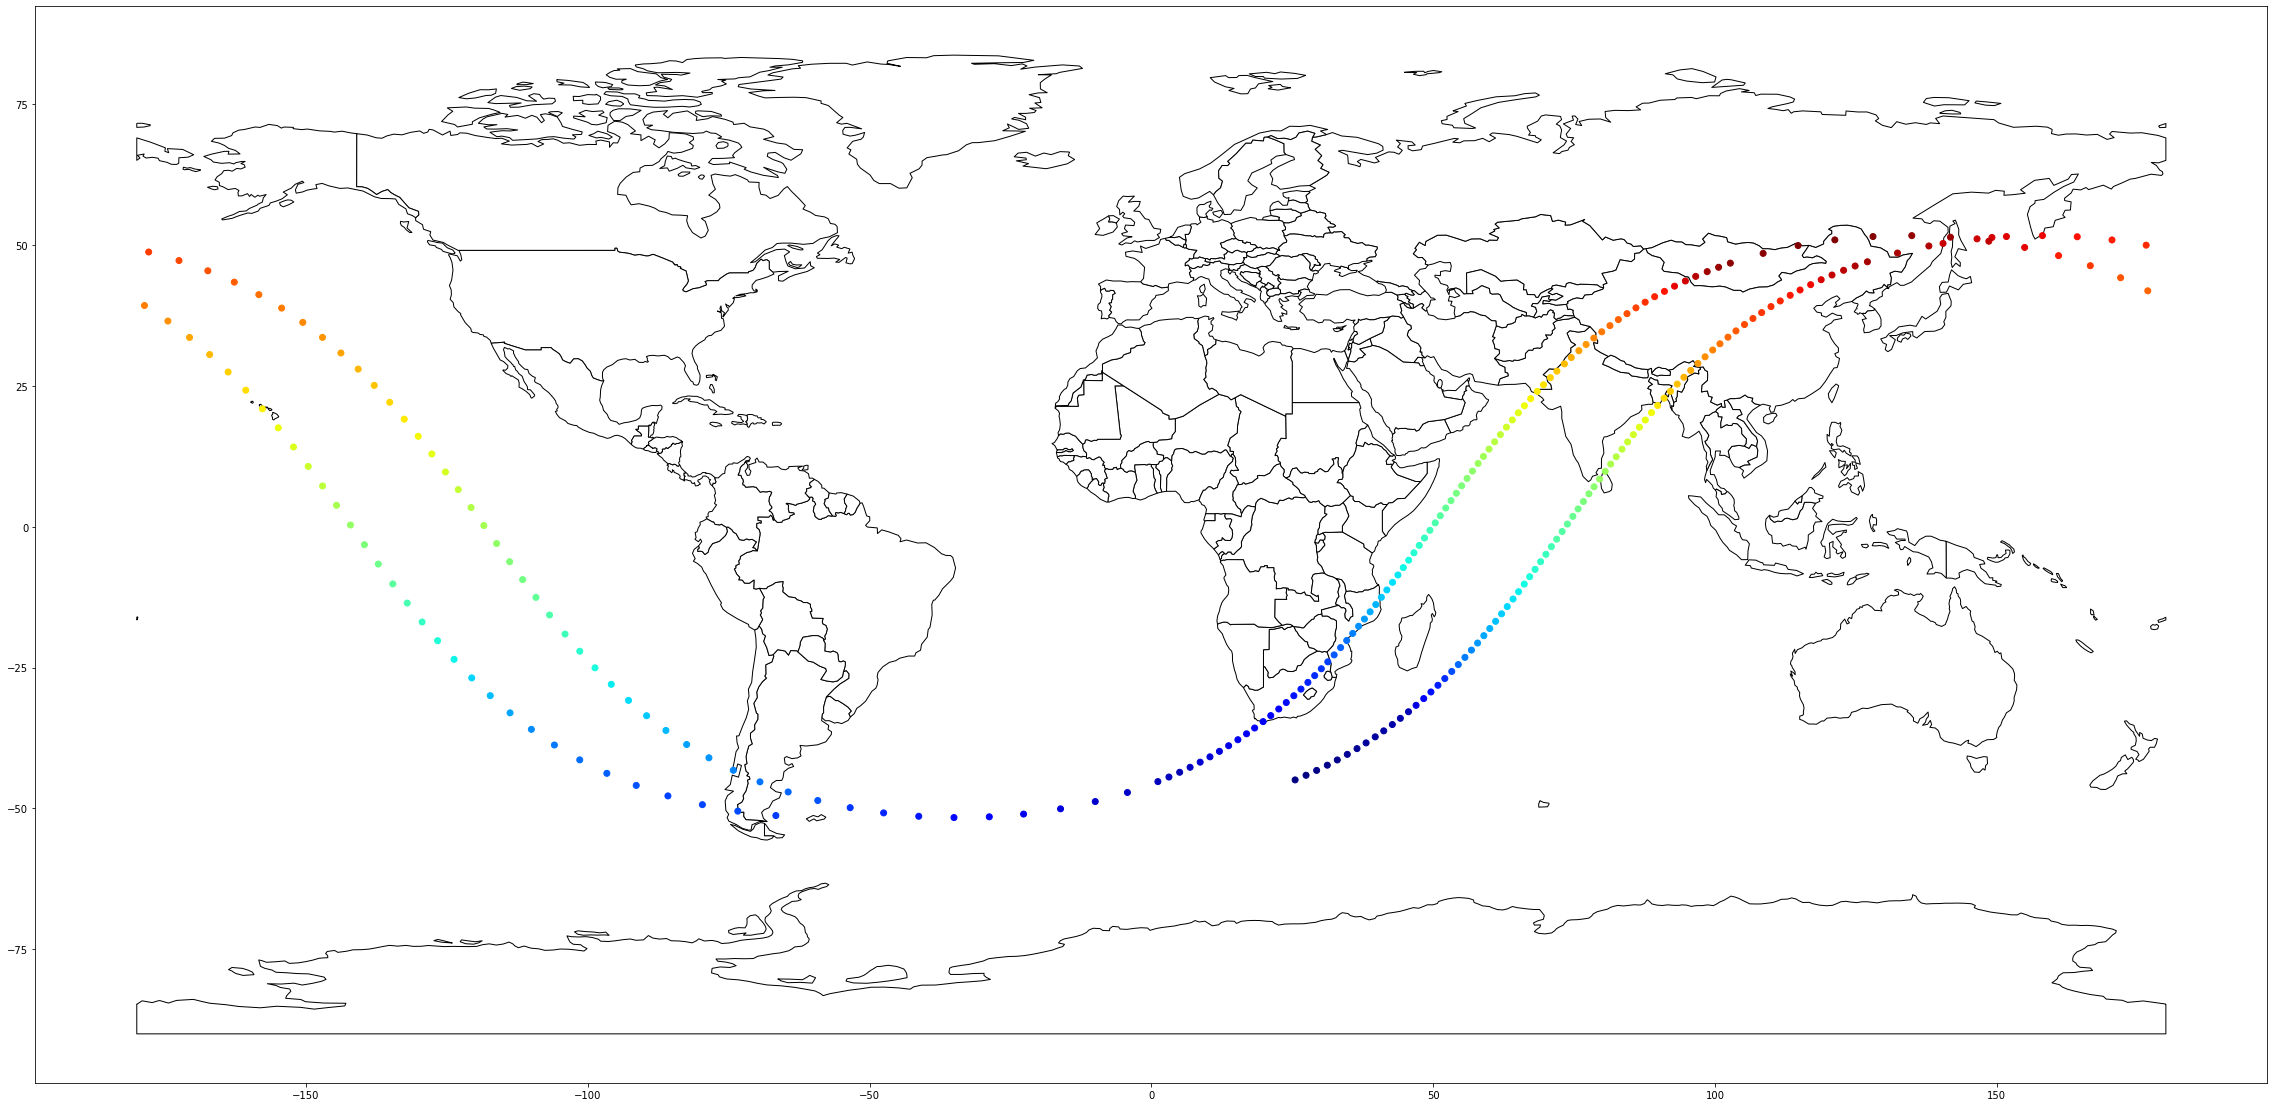

In [23]:
import matplotlib.pyplot as plt
gdf = geopandas.GeoDataFrame(
    iss_df, geometry=geopandas.points_from_xy(iss_df.lon, iss_df.lat))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

colormap = []
ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = iss_df['magnetic_field'], cmap = 'jet')
#plt.scatter(iss_, c = iss_df['magnetic_field'], cmap = 'jet')

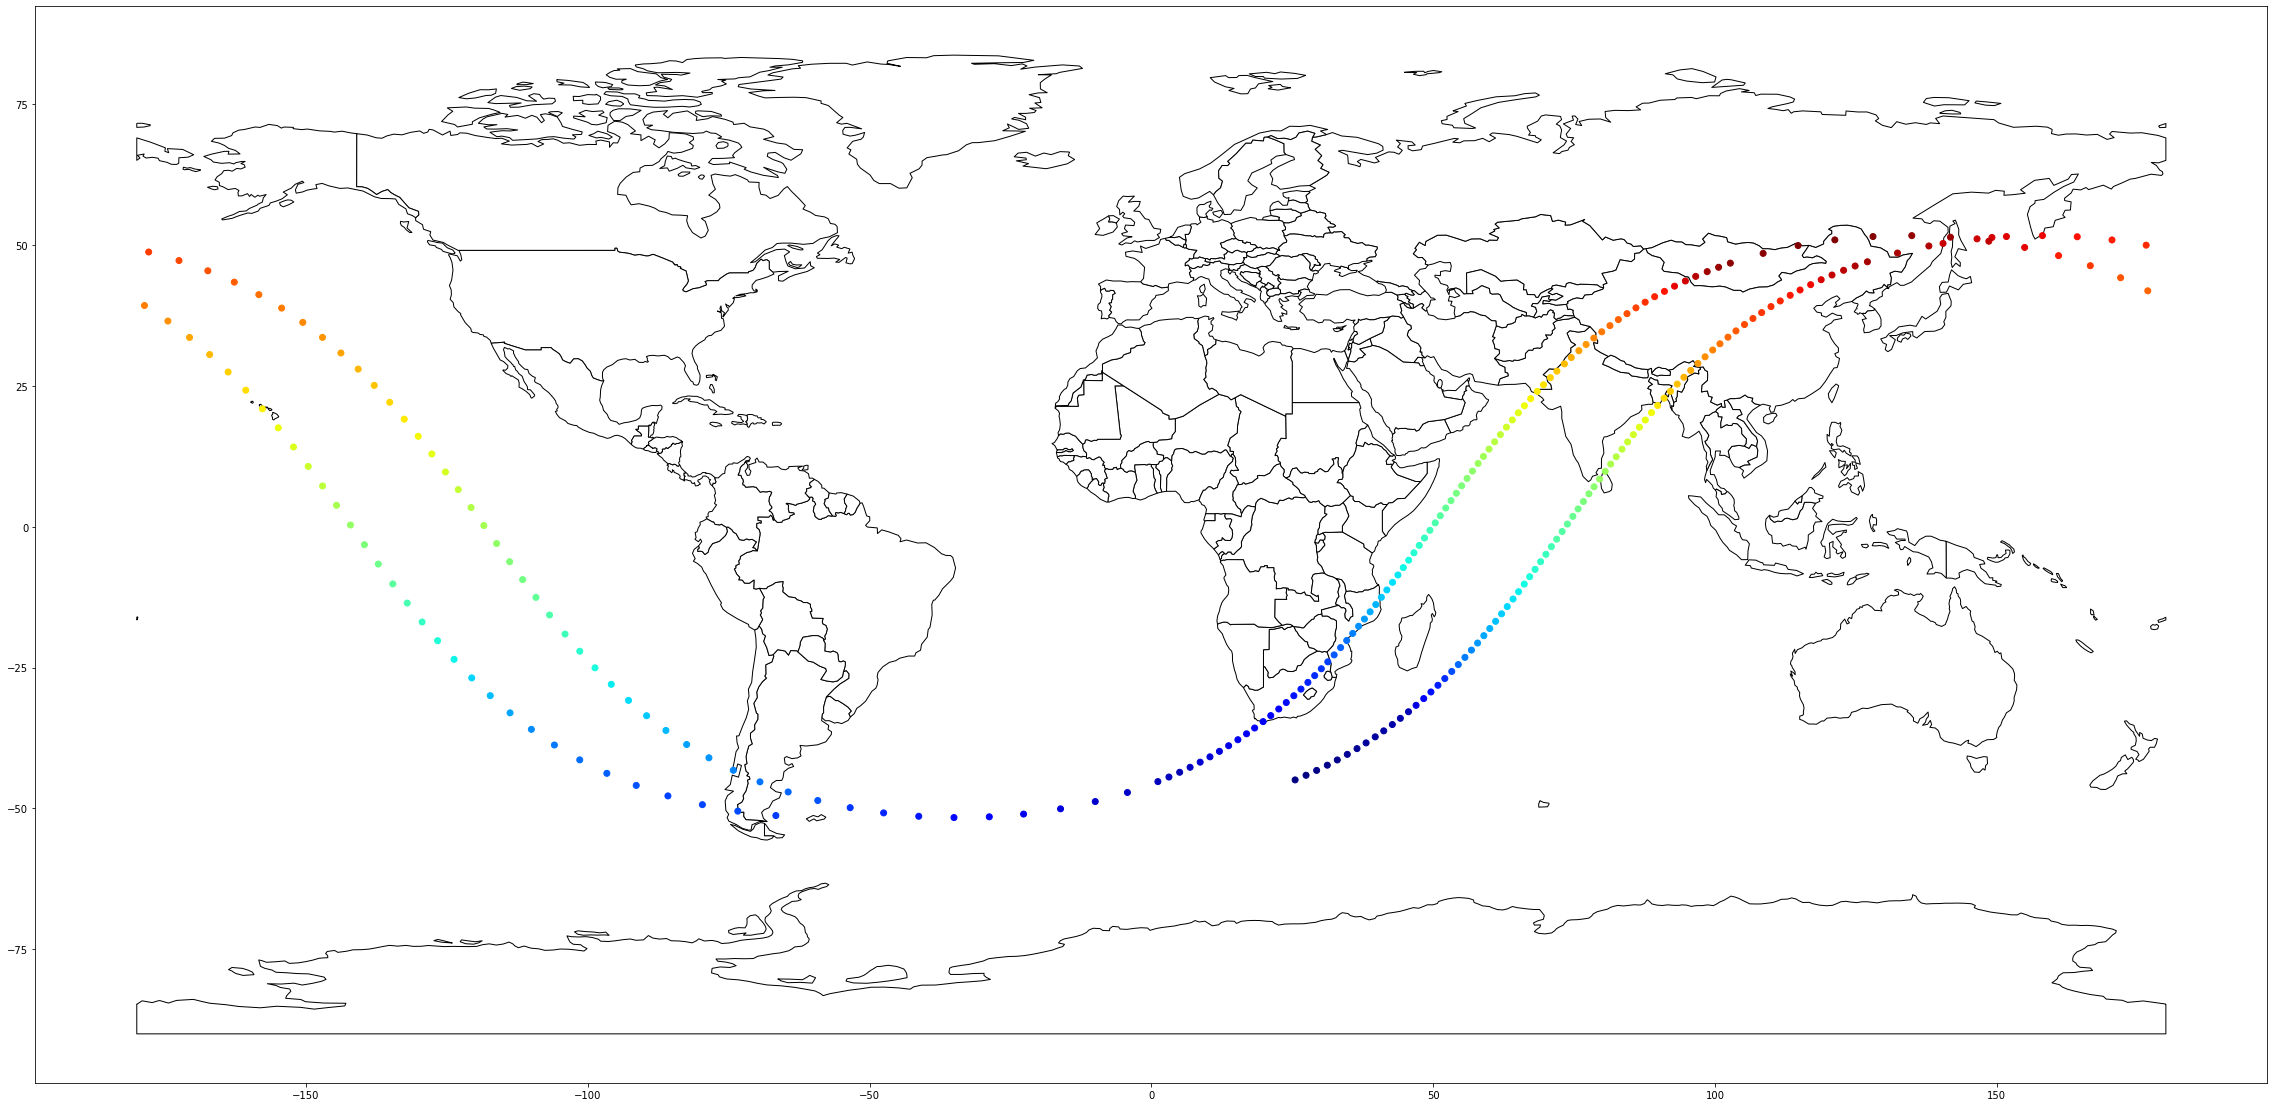

In [22]:
iss_df = iss_df.sort_values(by=['magnetic_field'])

gdf = geopandas.GeoDataFrame(
    iss_df, geometry=geopandas.points_from_xy(iss_df.lon, iss_df.lat))

ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = iss_df['magnetic_field'], cmap = 'jet')

# Grafico che mette in relazione longitudine e campo magnetico terrestre

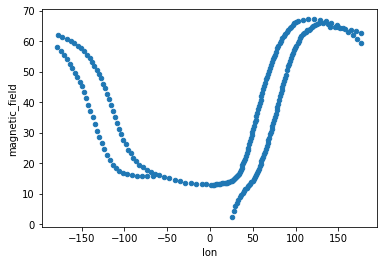

In [5]:
iss_df.plot.scatter(x='lon', y='magnetic_field')

# Grafico che mette in relazione latitudine e campo magnetico terrestre

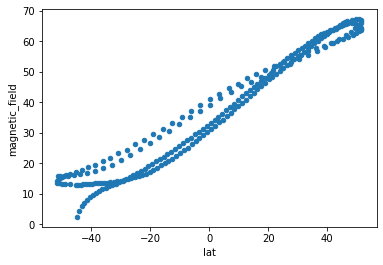

In [6]:
iss_df.plot.scatter(x='lat', y='magnetic_field')

In [7]:
veg_df.describe()

,<0.1,<0.2,<0.3,<0.4,<0.5,<0.6,<0.7,<0.8,<0.9,<=1.0,diff
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.132723,0.267464,0.262192,0.167747,0.093657,0.038689,0.016843,0.007083,0.003648,0.008145,0.002617
std,0.082162,0.213380,0.141602,0.116114,0.087264,0.038621,0.021994,0.015384,0.013263,0.009390,0.002229
min,0.062100,0.013000,0.008000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.084500,0.090400,0.163150,0.100500,0.024900,0.006200,0.002000,0.000700,0.000000,0.000900,0.000500
50%,0.107100,0.216400,0.247400,0.157000,0.073900,0.026900,0.007000,0.002200,0.000600,0.004100,0.002000
75%,0.150500,0.368300,0.376700,0.224000,0.129450,0.060750,0.024850,0.004850,0.001600,0.011550,0.004600
max,0.616500,0.866000,0.618000,0.563000,0.376200,0.141800,0.121200,0.086300,0.108800,0.037900,0.007000


In [8]:
max_veg = veg_df['<0.9'].max()

veg_df.loc[veg_df['<0.9']==max_veg]

,<0.1,<0.2,<0.3,<0.4,<0.5,<0.6,<0.7,<0.8,<0.9,<=1.0,diff
photo,,,,,,,,,,,
19,0.0621,0.1067,0.3281,0.1462,0.0707,0.0403,0.0482,0.0655,0.1088,0.0217,0.0013


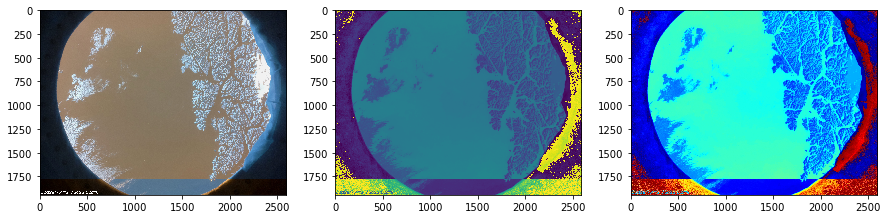

In [9]:
photo_id = 98

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(f'NewNDVI/woodsmissionteam_img_{str(photo_id).zfill(3)}.jpg')

img_bw = mpimg.imread(f'NewNDVI/woodsmissionteam_img_{str(photo_id).zfill(3)}_NDVI.jpg')

img_cm = mpimg.imread(f'NewNDVI/colormap/woodsmissionteam_img_{str(photo_id).zfill(3)}_NDVI_COLOR_JET.jpg')

fig = plt.figure(figsize=(15,15))

a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img)

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(img_bw)

a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(img_cm)

<0.1     0.1732
<0.2     0.0904
<0.3     0.1517
<0.4     0.1579
<0.5     0.3751
<0.6     0.0013
<0.7     0.0068
<0.8     0.0090
<0.9     0.0044
<=1.0    0.0285
diff     0.0003
Name: 98, dtype: float64


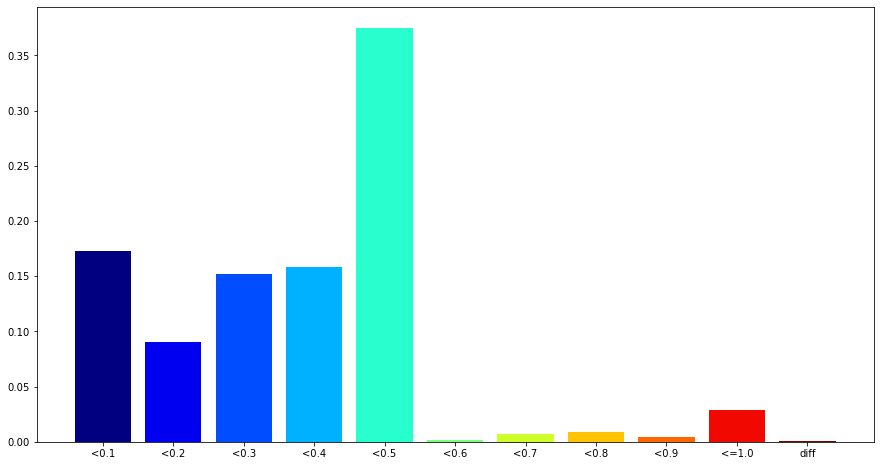

In [10]:
import numpy as np


labels = veg_df.columns
values = veg_df.loc[photo_id].to_numpy(dtype=np.float64)

plt.figure(figsize=(15,8))

cm_jet = cm.get_cmap('jet')

'''plt.bar(labels, values, color=['darkblue', 'blue', 'aquamarine',
                               'green', 'yellowgreen', 'yellow',
                               'orange', 'orangered', 'red',
                               'darkred', 'violet'])'''

np_index = np.arange(len(values))

plt.bar(labels, values, color=cm_jet(np_index/(len(values)-1)))

print(veg_df.loc[photo_id])
plt.show()